# TOXIC TWEETS

In [3]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\MyPC\Desktop\FinalBalancedDataset.csv')
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [5]:
df["Toxicity"].value_counts()

Toxicity
0    32592
1    24153
Name: count, dtype: int64

In [6]:
df = df.drop("Unnamed: 0", axis=1)

In [7]:
# Replacing punctuations with space
df['tweet_processed'] = df['tweet'].str.replace("[^a-zA-Z]", " ")

# Re ordering columns
df = df[['tweet','tweet_processed','Toxicity']]
df

,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,bihday your majesty,0
3,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,factsguide: society now #motivation,0
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
56741,"you've gone and broke the wrong heart baby, an...","you've gone and broke the wrong heart baby, an...",1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat!!.. dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,1


In [8]:
df['tweet_processed'] = [row.lower() for row in df['tweet_processed']]
df['tweet_processed']
     

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
56740    you's a muthaf***in lie &#8220;@lifeasking: @2...
56741    you've gone and broke the wrong heart baby, an...
56742    young buck wanna eat!!.. dat nigguh like i ain...
56743                youu got wild bitches tellin you lies
56744    ~~ruffled | ntac eileen dahlia - beautiful col...
Name: tweet_processed, Length: 56745, dtype: object

In [9]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
add_words = ['user','rt','amp','go','want','time','day','one','look','new','even','video','t','u','co','pa','us','ur','sta','ve','te','say','try','sunday','use','music','bhiday','put','two','guy','gon','w','monday','read','fathersday','gt','via','na','twitter','saturday','polar bear','way','n','may','im','b','post','ye','hea','forex','summer','make','see','weekend','back','tweet','hoe','someone','game','much','many','dont','cuz','pay','give','wit','make','bro','wan','da','lil','em','tho','aint','still','tf','oh','ta','yo','nah','ho','stfu','tryna','nig','kieffer','jason']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['tweet_processed'] = [remove_stopwords(r) for r in df['tweet_processed']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MyPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MyPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df

,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,@ father dysfunctional selfish drags kids dysf...,0
1,@user @user thanks for #lyft credit i can't us...,@ @ thanks # lyft credit ca n't cause n't offe...,0
2,bihday your majesty,bihday majesty,0
3,#model i love u take with u all the time in ...,# model love take urð± ! ! ! ðððð...,0
4,factsguide: society now #motivation,factsguide : society # motivation,0
...,...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,'s muthaf * * * lie & # 8220 ; @ lifeasking : ...,1
56741,"you've gone and broke the wrong heart baby, an...","'ve gone broke wrong heart baby , drove rednec...",1
56742,young buck wanna eat!!.. dat nigguh like I ain...,young buck eat ! ! .. dat nigguh like fuckin dis,1
56743,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,1


In [11]:
# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['tweet_processed'] = df['tweet_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MyPC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MyPC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MyPC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
df.head()

,tweet,tweet_processed,Toxicity
0,@user when a father is dysfunctional and is s...,@ father dysfunctional selfish drag kid dysfun...,0
1,@user @user thanks for #lyft credit i can't us...,@ @ thanks # lyft credit ca n't cause n't offe...,0
2,bihday your majesty,bihday majesty,0
3,#model i love u take with u all the time in ...,# model love take urð± ! ! ! ðððð...,0
4,factsguide: society now #motivation,factsguide : society # motivation,0


In [13]:
# WORDS

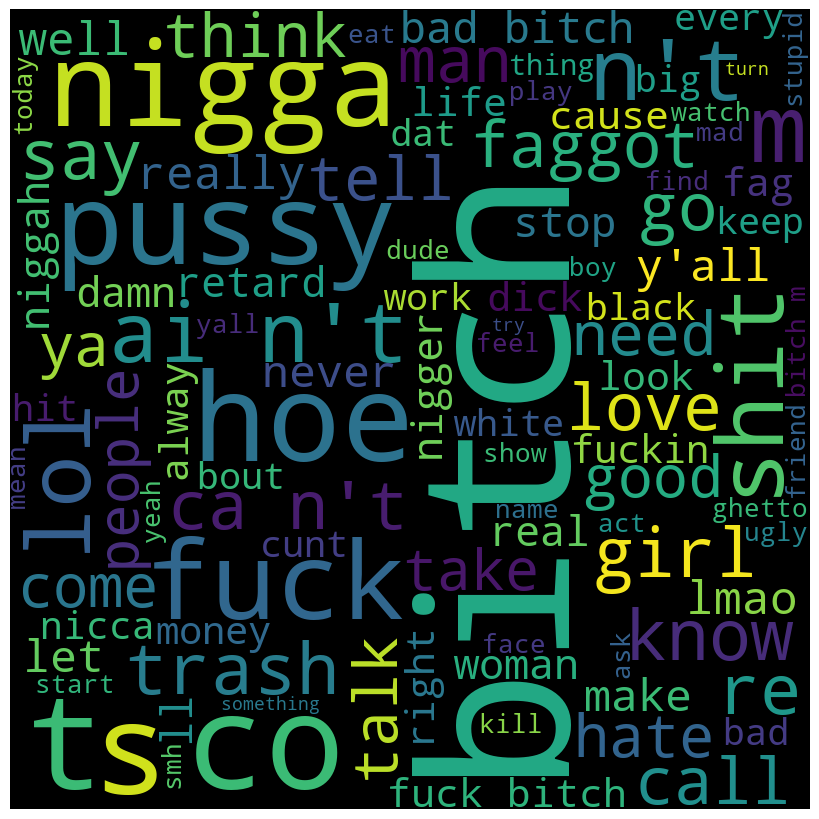

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_df = df.loc[df['Toxicity'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['tweet_processed']])


wordcloud = WordCloud(width=800, height=800, background_color='black', max_words=100).generate(all_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
tweet = df['tweet_processed']
labels = df['Toxicity']
     

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(tweet)

# TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(tweet)

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf,y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)
     



In [16]:
#df_bow = pd.DataFrame(X_bow.todense(),columns = sorted(vectorizer.vocabulary_))
#df_bow

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
xb_train = scaler.fit_transform(X_train_bow)
xb_test = scaler.transform(X_test_bow)
     

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
xt_train = scaler.fit_transform(X_train_tfidf)
xt_test = scaler.transform(X_test_tfidf)


# DECISION TREE

In [16]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
params = {'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':range(3,50)}

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(X_train_bow, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(3, 50),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [17]:
finalmodel_dtc_bagofwords = model.set_params(**rcv.best_params_)
finalmodel_dtc_bagofwords.fit(X_train_bow, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=49, splitter='random')

In [18]:
preds_dtb = finalmodel_dtc_bagofwords.predict(X_test_bow)

Precision: 0.9509116409537167
Recall: 0.8341193356571663
F1-score: 0.8886947023484435


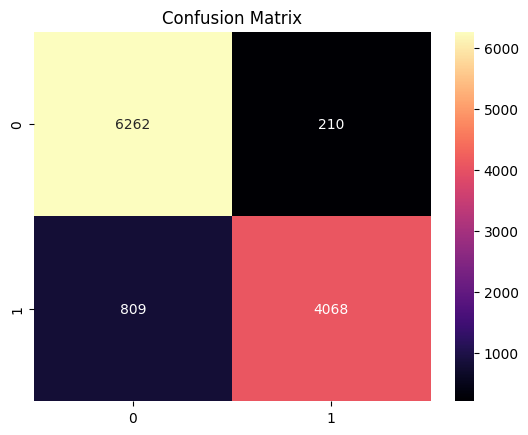

<Figure size 600x600 with 0 Axes>

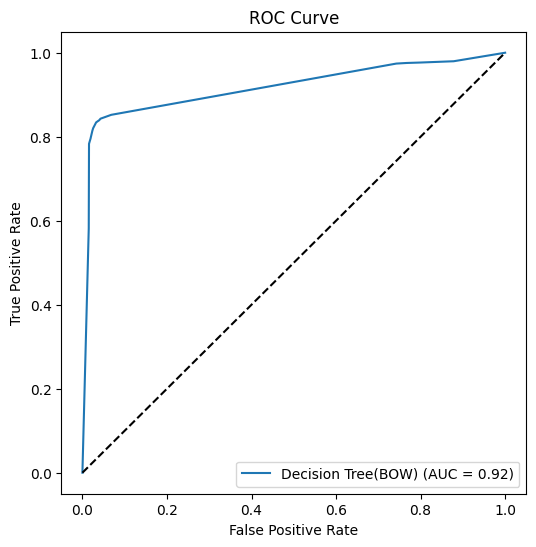

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_dtb)
recall = recall_score(y_test, preds_dtb)
f1 = f1_score(y_test, preds_dtb)
cm_dtb = confusion_matrix(y_test, preds_dtb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_dtb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_dtb = finalmodel_dtc_bagofwords.predict_proba(X_test_bow)[:, 1]
roc_auc_dtb = roc_auc_score(y_test, y_scores_dtb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_dtb)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Decision Tree(BOW) (AUC = {:.2f})'.format(roc_auc_dtb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()
params = {'criterion':['gini','entropy','log_loss'],
          'splitter':['best','random'],
          'max_depth':range(3,50)}

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(X_train_tfidf, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(3, 50),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [21]:
finalmodel_dtc_tfidf = model.set_params(**rcv.best_params_)
finalmodel_dtc_tfidf.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=40)

In [22]:
preds_dtt = finalmodel_dtc_tfidf.predict(X_test_tfidf)

Precision: 0.9456801685787871
Recall: 0.8281730572072996
F1-score: 0.8830345430695234


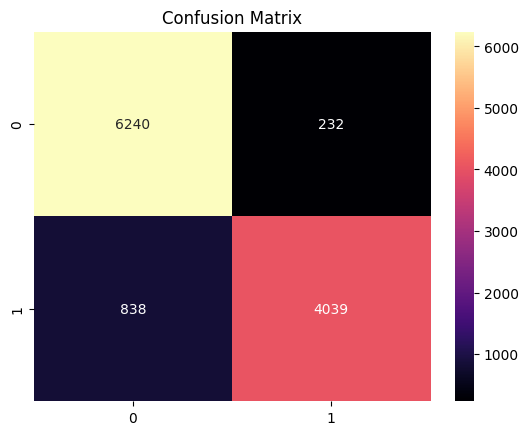

<Figure size 600x600 with 0 Axes>

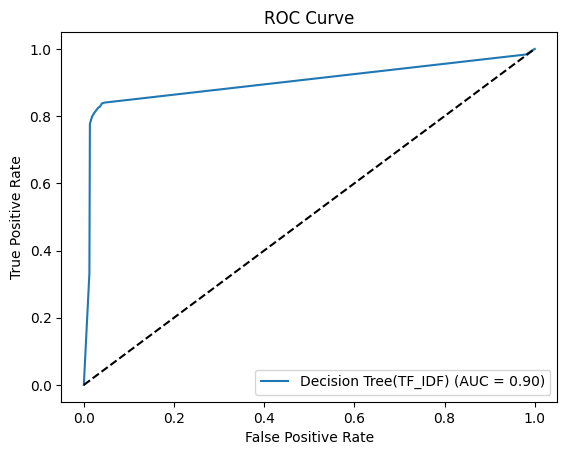

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_dtt)
recall = recall_score(y_test, preds_dtt)
f1 = f1_score(y_test, preds_dtt)
cm_dtt = confusion_matrix(y_test, preds_dtt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_dtt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_dtt = finalmodel_dtc_tfidf.predict_proba(X_test_tfidf)[:, 1]
roc_auc_dtt = roc_auc_score(y_test, y_scores_dtt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_dtt)
plt.plot(fpr, tpr, label='Decision Tree(TF_IDF) (AUC = {:.2f})'.format(roc_auc_dtt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_bow, y_train)


RandomForestClassifier()

In [25]:
preds_rfb = rfc.predict(X_test_bow)

Precision: 0.9142916579987518
Recall: 0.9011687512815255
F1-score: 0.9076827757125155


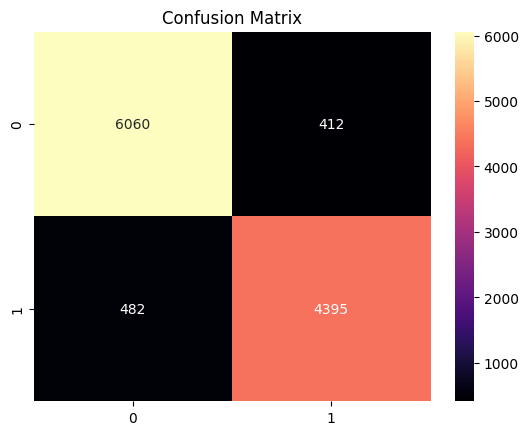

<Figure size 600x600 with 0 Axes>

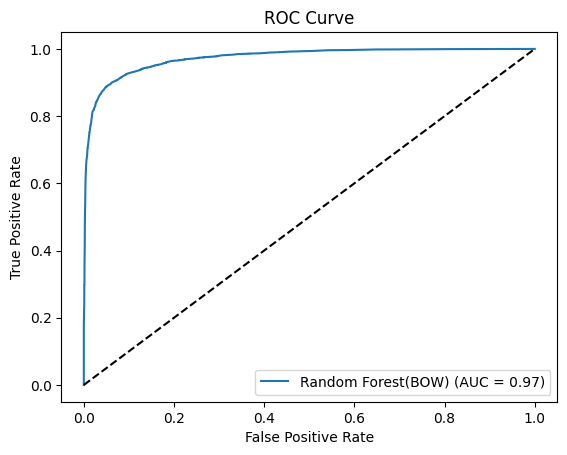

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_rfb)
recall = recall_score(y_test, preds_rfb)
f1 = f1_score(y_test, preds_rfb)
cm_rfb = confusion_matrix(y_test, preds_rfb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_rfb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_rfb = rfc.predict_proba(X_test_bow)[:, 1]
roc_auc_rfb = roc_auc_score(y_test, y_scores_rfb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rfb)
plt.plot(fpr, tpr, label='Random Forest(BOW) (AUC = {:.2f})'.format(roc_auc_rfb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [28]:
preds_rft = rfc.predict(X_test_tfidf)

Precision: 0.9269271383315734
Recall: 0.8999384867746566
F1-score: 0.9132334581772783


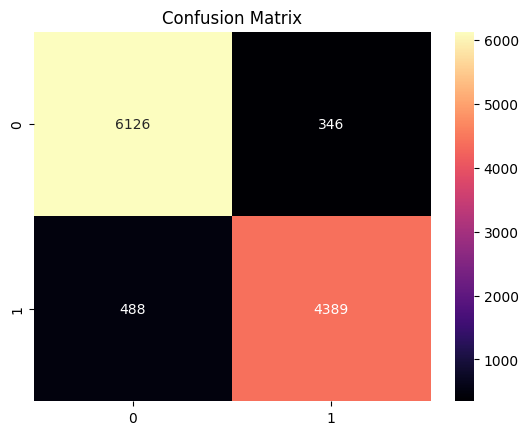

<Figure size 600x600 with 0 Axes>

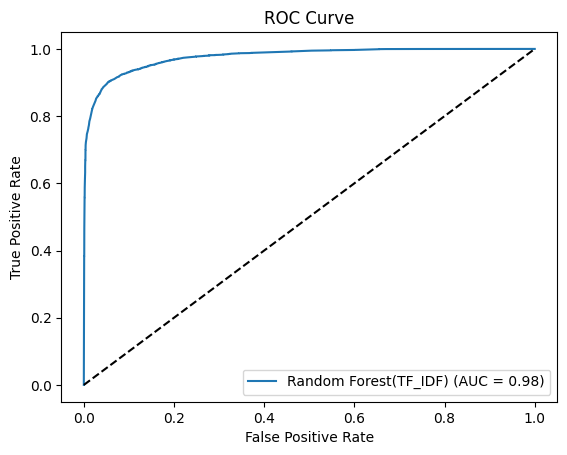

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_rft)
recall = recall_score(y_test, preds_rft)
f1 = f1_score(y_test, preds_rft)
cm_rft = confusion_matrix(y_test, preds_rft)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_rft, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_rft = rfc.predict_proba(X_test_tfidf)[:, 1]
roc_auc_rft = roc_auc_score(y_test, y_scores_rft)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rft)
plt.plot(fpr, tpr, label='Random Forest(TF_IDF) (AUC = {:.2f})'.format(roc_auc_rft))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# NAIVE BAYES

Precision: 0.8706131893559583
Recall: 0.9257740414189051
F1-score: 0.8973467156911458


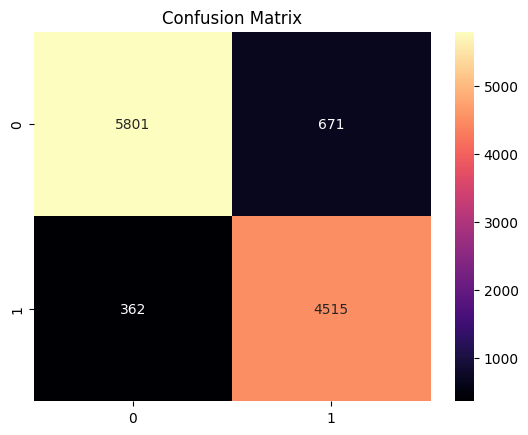

<Figure size 600x600 with 0 Axes>

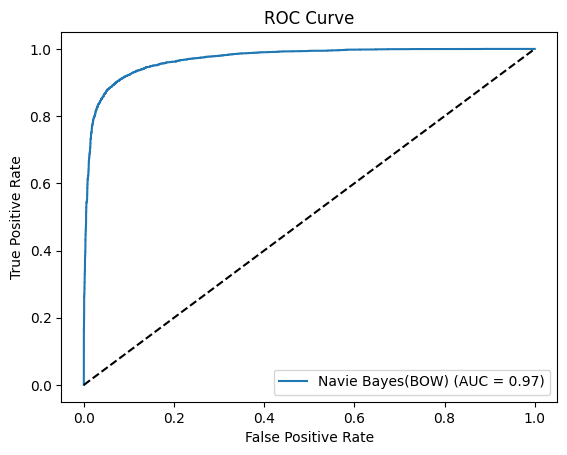

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)
preds_nbb = nb.predict(X_test_bow)
     

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_nbb)
recall = recall_score(y_test, preds_nbb)
f1 = f1_score(y_test, preds_nbb)
cm_nbb = confusion_matrix(y_test, preds_nbb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_nbb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_nbb = nb.predict_proba(X_test_bow)[:, 1]
roc_auc_nbb = roc_auc_score(y_test, y_scores_nbb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_nbb)
plt.plot(fpr, tpr, label='Navie Bayes(BOW) (AUC = {:.2f})'.format(roc_auc_nbb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
     

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

Precision: 0.8961012028204065
Recall: 0.8859954890301415
F1-score: 0.89101969275183


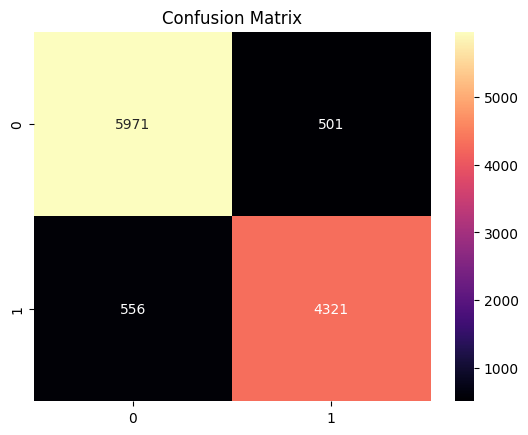

<Figure size 600x600 with 0 Axes>

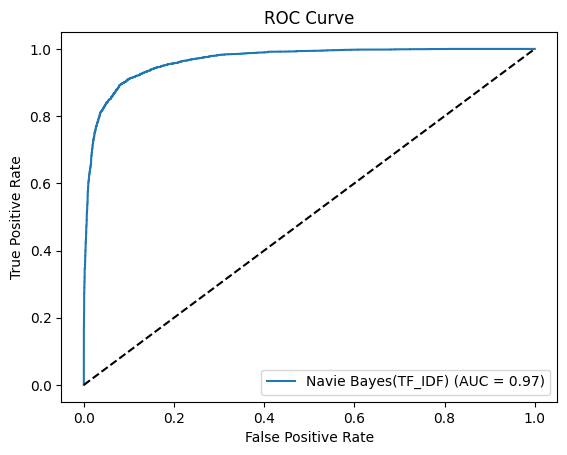

In [32]:
preds_nbt = nb.predict(X_test_tfidf)
     

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_nbt)
recall = recall_score(y_test, preds_nbt)
f1 = f1_score(y_test, preds_nbt)
cm_nbt = confusion_matrix(y_test, preds_nbt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_nbt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_nbt = nb.predict_proba(X_test_tfidf)[:, 1]
roc_auc_nbt = roc_auc_score(y_test, y_scores_nbt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_nbt)
plt.plot(fpr, tpr, label='Navie Bayes(TF_IDF) (AUC = {:.2f})'.format(roc_auc_nbt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
     

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_bow = KNeighborsClassifier()
params = {'n_neighbors': range(0,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(X_train_bow, y_train)
     

C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(0, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [34]:
finalmodel_knnb_bow = knn_bow.set_params(**rcv_knn.best_params_)
finalmodel_knnb_bow.fit(X_train_bow, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

Precision: 0.9624425830856526
Recall: 0.730367028911216
F1-score: 0.8304966192585684


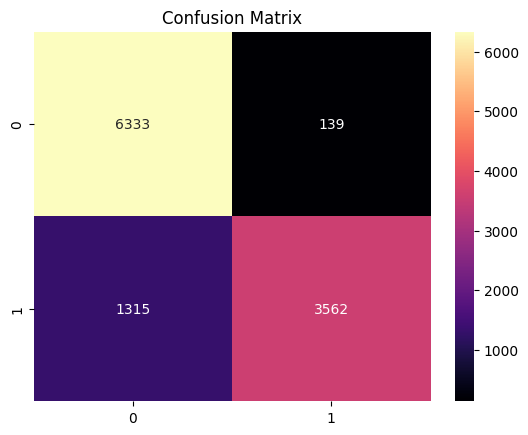

<Figure size 600x600 with 0 Axes>

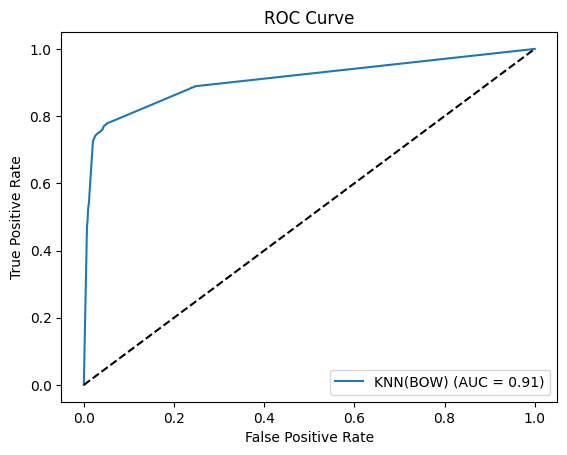

In [35]:
preds_knnb = finalmodel_knnb_bow.predict(X_test_bow)
     

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_knnb)
recall = recall_score(y_test, preds_knnb)
f1 = f1_score(y_test, preds_knnb)
cm_knnb = confusion_matrix(y_test, preds_knnb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_knnb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_knnb = finalmodel_knnb_bow.predict_proba(X_test_bow)[:, 1]
roc_auc_knnb = roc_auc_score(y_test, y_scores_knnb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knnb)
plt.plot(fpr, tpr, label='KNN(BOW) (AUC = {:.2f})'.format(roc_auc_knnb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_bow = KNeighborsClassifier()
params = {'n_neighbors': range(0,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn_tfidf = RandomizedSearchCV(knn_bow, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn_tfidf.fit(X_train_tfidf, y_train)

C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\MyPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(0, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [37]:
finalmodel_knnt_tfidf = knn_bow.set_params(**rcv_knn_tfidf.best_params_)
finalmodel_knnt_tfidf.fit(X_train_tfidf, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=9, weights='distance')

Precision: 0.8597600872410033
Recall: 0.8082837810129178
F1-score: 0.8332276474318325


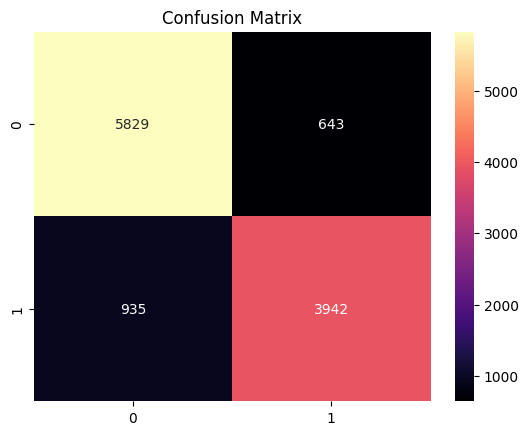

<Figure size 600x600 with 0 Axes>

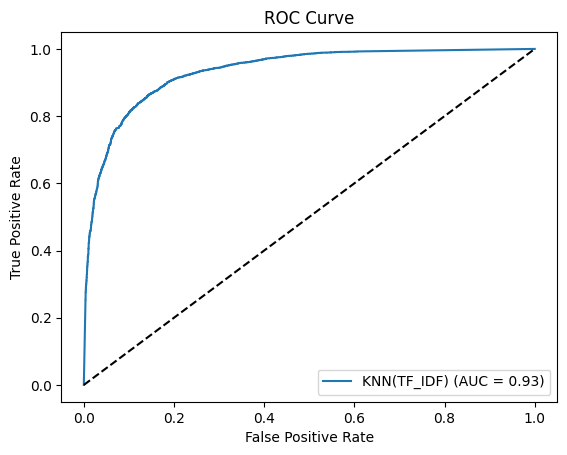

In [38]:
preds_knnt = finalmodel_knnt_tfidf.predict(X_test_tfidf)
     

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_knnt)
recall = recall_score(y_test, preds_knnt)
f1 = f1_score(y_test, preds_knnt)
cm_knnt = confusion_matrix(y_test, preds_knnt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_knnt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_knnt = finalmodel_knnt_tfidf.predict_proba(X_test_tfidf)[:, 1]
roc_auc_knnt = roc_auc_score(y_test, y_scores_knnt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knnt)
plt.plot(fpr, tpr, label='KNN(TF_IDF) (AUC = {:.2f})'.format(roc_auc_knnt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.svm import SVC
svm_bow = SVC(probability=True)
svm_bow.fit(X_train_bow, y_train)

SVC(probability=True)

Precision: 0.9602194787379973
Recall: 0.8611851548082837
F1-score: 0.9080099448708248


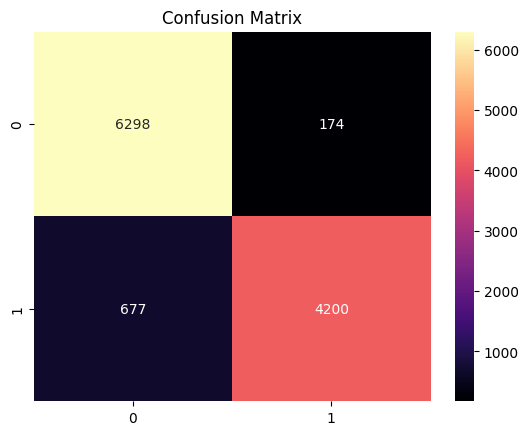

<Figure size 600x600 with 0 Axes>

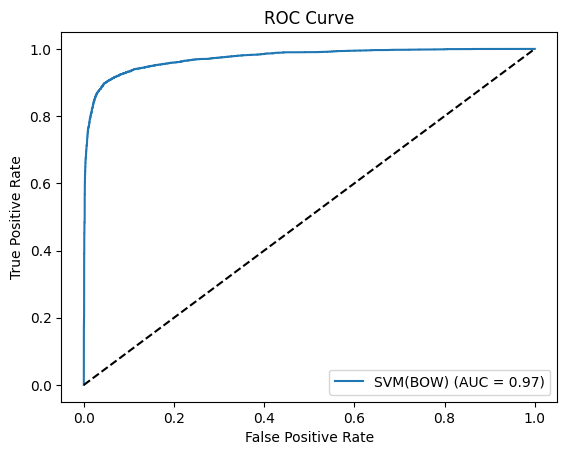

In [40]:
preds_svmb = svm_bow.predict(X_test_bow)

     

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_svmb)
recall = recall_score(y_test, preds_svmb)
f1 = f1_score(y_test, preds_svmb)
cm_svmb = confusion_matrix(y_test, preds_svmb)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_svmb, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_svmb = svm_bow.predict_proba(X_test_bow)[:, 1]
roc_auc_svmb = roc_auc_score(y_test, y_scores_svmb)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svmb)
plt.plot(fpr, tpr, label='SVM(BOW) (AUC = {:.2f})'.format(roc_auc_svmb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
     

In [41]:
from sklearn.svm import SVC
svm_tfidf = SVC(probability=True)
svm_tfidf.fit(X_train_tfidf, y_train)

SVC(probability=True)

Precision: 0.9637448370812299
Recall: 0.8611851548082837
F1-score: 0.9095831077422848


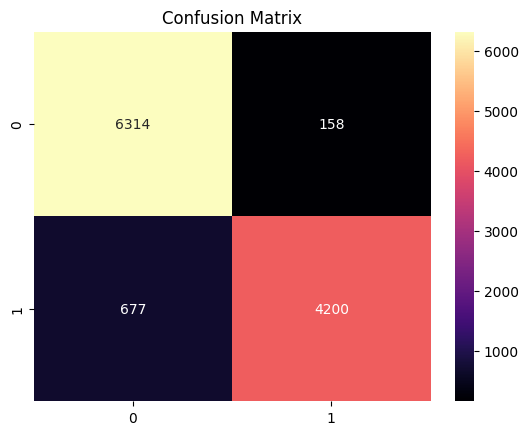

<Figure size 600x600 with 0 Axes>

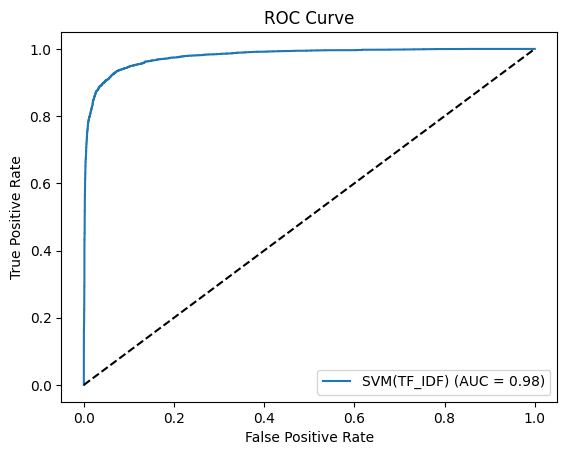

In [42]:
preds_svmt = svm_tfidf.predict(X_test_tfidf)

     

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calculating the Evaluation Metrics
precision = precision_score(y_test, preds_svmt)
recall = recall_score(y_test, preds_svmt)
f1 = f1_score(y_test, preds_svmt)
cm_svmt = confusion_matrix(y_test, preds_svmt)


# Printing the Evalution Metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Ploting the Heatmap
sns.heatmap(cm_svmt, cmap='magma', annot = True, fmt =".0f")
plt.title("Confusion Matrix")
plt.figure(figsize=(6, 6))
plt.show()



# Calculate ROC-AUC score
y_scores_svmt = svm_tfidf.predict_proba(X_test_tfidf)[:, 1]
roc_auc_svmt = roc_auc_score(y_test, y_scores_svmt)


# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svmt)
plt.plot(fpr, tpr, label='SVM(TF_IDF) (AUC = {:.2f})'.format(roc_auc_svmt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()